In [1]:
import networkx as nx
import matplotlib.pyplot as plt

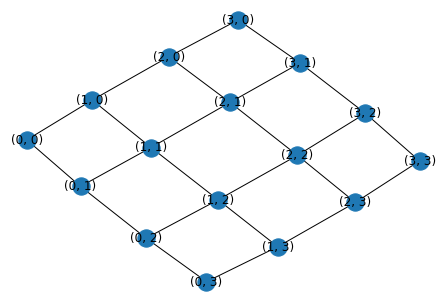

In [33]:
G = nx.grid_2d_graph(4, 4)
nx.draw(G, with_labels=True)

In [32]:
start= (3, 3)
end= (1, 1)

to_send= [start]
sent= {} # Dict that keeps entries as { visited_peer : peer_that_sent_the_query }
propagated= [] # List of peers that has propagated to its neighbor
count= 0

while(to_send != []):
    node= to_send.pop(0)
    neighbors= [n for n in G.neighbors(node)]
    if node in propagated: # Peer that was sent the query before won't propagate the query anymore
        continue
    else:
        propagated.append(node)
    for n in neighbors:
        if n == end:
            print(node, '->', n)
            print('>>> It took', count + 1, 'queries for', start, 'to reach', end, '.')
            break
            
        should_send= False
        if node not in sent:
            should_send= True
        elif sent[node] != n:
            should_send= True # Peer shouldn't send the query back to the peer that has just sent it the query
            
        if should_send:
            print(node, '->', n)
            sent[n]= node
            to_send.append(n)
            count+= 1
    else:
        continue
    break

# print(sent)
    

(3, 3) -> (2, 3)
(3, 3) -> (3, 2)
(2, 3) -> (1, 3)
(2, 3) -> (2, 2)
(3, 2) -> (2, 2)
(3, 2) -> (3, 1)
(1, 3) -> (0, 3)
(1, 3) -> (1, 2)
(2, 2) -> (1, 2)
(2, 2) -> (2, 1)
(2, 2) -> (2, 3)
(3, 1) -> (2, 1)
(3, 1) -> (3, 0)
(0, 3) -> (0, 2)
(1, 2) -> (0, 2)
(1, 2) -> (1, 1)
>>> It took 16 queries for (3, 3) to reach (1, 1) .
